In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('data_binary_values.csv')

In [5]:
data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [8]:
x = data[list(data.drop('y', axis=1).columns)]
y = data['y']

In [32]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.25, stratify=y)

In [45]:
SEED = 6
np.random.seed(SEED)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=6)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 30891 elementos e testaremos com 10297 elementos
A acurácia foi 89.91%


In [23]:
!pip install graphviz

In [24]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

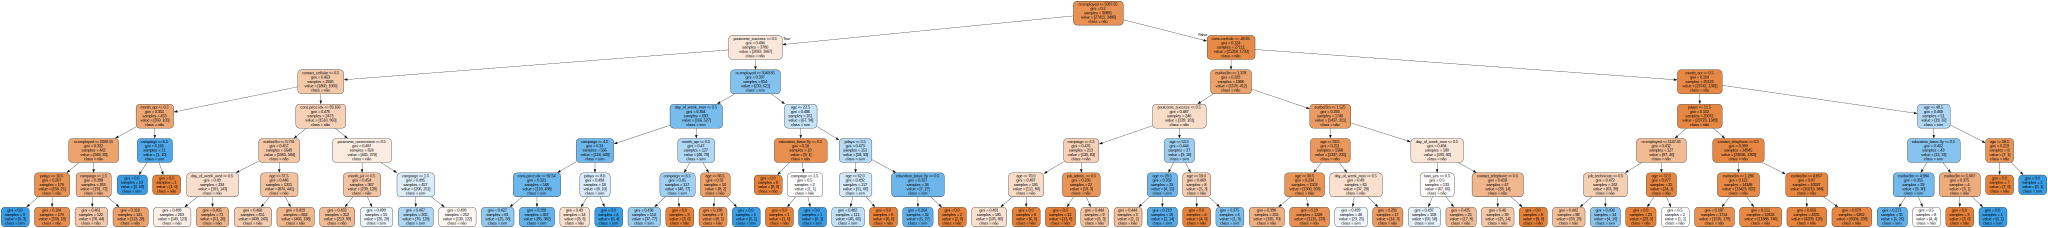

In [46]:
from sklearn.tree import export_graphviz
import graphviz
features = x.columns
dot_data = export_graphviz(modelo, feature_names = features,
                          filled=True, rounded=True,
                          class_names = ["não", 'sim'])
grafico = graphviz.Source(dot_data)
grafico

In [31]:
grafico.render("arvore", format="png")

'arvore.png'

tasks:

renomear colunas.

identificar pontos principais da árvore de decisão. Que tipo de pessoa mais provável de fazer o empréstimo e qual tipo de pessoa menos provável de fazer o empréstimo?